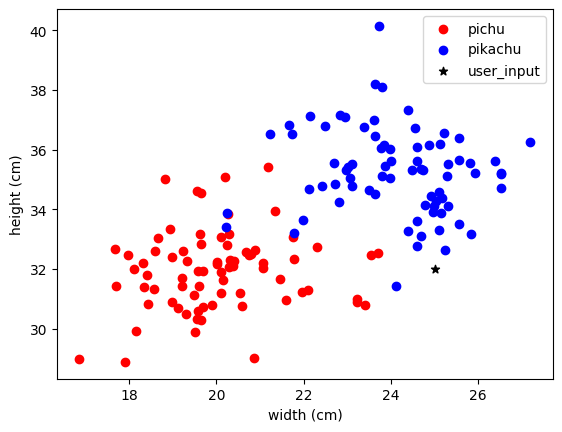

Sample with (width, height): (25.0, 32.0) is classified as Pikachu
Sample with (width, height): (24.2, 31.5) is classified as Pikachu
Sample with (width, height): (22.0, 34.0) is classified as Pikachu
Sample with (width, height): (20.5, 34.0) is classified as Pichu
Your width: 25.0 and your height: 32.0. It's classified as Pikachu


In [21]:
import numpy as np
import matplotlib.pyplot as plt




path = "datapoints.txt"               
data_list = []                           # Skapar en tom lista.


with open(path, 'r') as file:              # Öppnar och läser in filen
    next(file)                             # Hoppar över HEAD i textfilen.
    
    for line in file:                       
        data_line = line.strip().split(',')    # Loopar igenom txt och tar bort whitespaces och splittar lines med kommatecken.
        
        width = float(data_line[0])            # Beskriver postion i txt samt gör om string till float eller integer.
        height = float(data_line[1])
        label = int(data_line[2])
        
        data_list.append((width, height, label))
        
        
def split_data(data_list):
    pichu = []
    pikachu = []

    for row in data_list:
        
        width, height, label = row
        if label == 0:
            pichu.append((width,height))
        elif label == 1:
            pikachu.append((width,height))

    return pichu, pikachu

#print(data_list)
pichu,pikachu = split_data(data_list)

# print(len(pichu))

def scatter(pichu, pikachu):
    pichu_widths = [data[0] for data in pichu]
    pichu_heights = [data[1] for data in pichu]

    pikachu_widths = [data[0] for data in pikachu]
    pikachu_heights = [data[1] for data in pikachu]
    # print(len(pichu_widths))
   
   
    plt.scatter(pichu_widths, pichu_heights, c = "red", label = "pichu")
    plt.scatter(pikachu_widths, pikachu_heights, c = "blue", label = "pikachu")
    plt.scatter(user_width,user_height, c = "black", label = "user_input", marker = "*")
    plt.xlabel("width (cm)")
    plt.ylabel("height (cm)")
    plt.legend()
    plt.show()
scatter(pichu, pikachu)



def get_testpoints():                               # Öppnar,läser testpointsfilen. Loopar och lägger till i en lista.
    path = "testpoints.txt"
    testpoints_list = []

    with open(path, "r") as file:
        next(file)                                  # Hoppar över HEADERN : "Test points"
        for line in file:
            line = line[line.find("(")+1 : line.find(")")]
            parts = line.split(",")
            width = float(parts[0])            
            height = float(parts[1])
            testpoints_list.append((width,height))
            
            
    return testpoints_list


testpoints = get_testpoints()

#print(testpoints)
        

def calculate_distance(x1, y1, x2, y2):                             # Function för euclidean distance.
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)



def testpoints_classify():                                          #Function som loopar igenom och avgör nearest point = label.
    classified_testpoints = []
    
    for testpoint in testpoints:                                    # For-loop för testpoints
        test_width, test_height = testpoint
        min_distance = float("inf")
        nearest_label = None
        
        for data in data_list:                                      # For-loop för datapoints
            
            data_width = float(data[0])
            data_height = float(data[1])
            label = data[2]
            
           
            distance = calculate_distance(test_width, test_height, data_width, data_height) # Anropar functionen som beräknar Euclidean distance
            
            if distance < min_distance:
                min_distance = distance
                nearest_label = label
           
        
        
        if nearest_label == 0:                                          # If-sats för nearest label och append i C-testpoints.
            classified_testpoints.append(("Pichu", testpoint))
        else:
            classified_testpoints.append(("Pikachu", testpoint))
    
    return classified_testpoints



classfied_testpoints = testpoints_classify()

for label, testpoint in classfied_testpoints:
    print(f"Sample with (width, height): {testpoint} is classified as {label}")



def user_input():                                                              
    while True:                                                                    # Felhantering av user input. 
        try:
            user_width = float(input("Please enter a testpoint(width)"))
            user_height = float(input("Please enter a testpoint(height)"))
            

            if user_width < 0 or user_height < 0:
                raise ValueError("Sorry, positive numbers only")
            
            return (user_width, user_height)
            
        except ValueError as err:
            print(f"The input must be numbers: {err}")
        user_width, user_height = user_input()



def classify_user_input(user_width, user_height, k=10):                           # Function som jämför input med datapoints, beräknar ut distance och avgör class.
    # min_distance = float("inf")                                                 
    # nearest_label = None
    knn_neighbour = []                                                             
    
    for data in data_list:
        data_width = data[0]
        data_height = data[1]
        label = data[2]

        distance = calculate_distance(user_width, user_height, data_width, data_height)  
        knn_neighbour.append((distance,label))                                           
                                                                                         
    knn_neighbour.sort(key=lambda x: x[0])                                               # * Modifierad kod från Chat-GPT
    nearest_neighbour = knn_neighbour[:k]                                                # * Prompten var att få ut KNN inne i denna functionen
                                                                                         
    pichu_count = sum(1 for neighbour in nearest_neighbour if neighbour[1] == 0)         # * Även hämtad inspiration ifrån:
    pikachu_count = sum(1 for neighbour in nearest_neighbour if neighbour[1] == 1)       # * https://www.w3schools.com/python/python_ml_knn.asp
    
    # if distance < min_distance:                                                       # Bortkommenterad kod då vi letar efter 10 KNN istälet för 1 värde.
    #     min_distance = distance
    #     nearest_label = label

    if pichu_count > pikachu_count:                                         # KNN majority vote IF-sats.
            return "Pichu"
    else:
            return "Pikachu"
        
user_width, user_height = user_input()
classification = classify_user_input(user_width, user_height)  


print(f"Your width: {user_width} and your height: {user_height}. It's classified as {classification}")






In [72]:
import random
path = "datapoints.txt"               
data_list = []                           


with open(path, 'r') as file:              
    next(file)                             
    
    for line in file:                       
        data_line = line.strip().split(',')   
        width = float(data_line[0])           
        height = float(data_line[1])
        label = int(data_line[2])
        
        data_list.append((width, height, label)) 


def split_data(data_list):
    training_data = []
    test_data = []
    pichu = [data for data in data_list if data[2] == 0]
    pikachu = [data for data in data_list if data[2]== 1]


    random.shuffle(pichu)
    random.shuffle(pikachu)
    
    training_data = pichu[:50] + pikachu[:50]
    test_data = pichu[50:75] + pikachu[50:75]
   



    return training_data, test_data

training_data, test_data = split_data(data_list)



# def calculate_accuracy():

#     TP =
#     FP =
#     TN =
#     FN =










50
